In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stroke-standard.csv')
df.shape

(3915, 16)

In [ ]:
data = df.drop(['stroke'], axis=1)    
target = df['stroke']               

from imblearn.under_sampling import RandomUnderSampler     
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2) 
data_under, target_under = undersample.fit_resample(data, target)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data_under, target_under, test_size=0.5, random_state=42, stratify=target_under)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (386, 15)
X_test shape: (386, 15)


# 1. Neural Network (It must use standardized variables)

In [ ]:
# Neural Network Default wtih adam solver
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)  # To avoid convergence warinng, set max_iter = 2000.
                      
clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)  # Use the trained Classifier to predict values 
accuracy = accuracy_score(y_test, pred)

print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train))) 
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.98964
Neural Network Test set score:0.72280


In [ ]:
# GridSearchCV.
# alpha=0.0001 default.
# alpha=0.01 -> Medium regularization on weights
# alpha=1 -> stronger regularization on weights

from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
          'activation':['tanh','relu', 'logistic']
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_)) 

GridSearchCV max accuracy:0.78505
GridSearchCV best parameter: {'activation': 'relu', 'alpha': 0.0001, 'solver': 'sgd'}


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.75648
ROC AUC on test set:0.76318


True Negative:256, False Negative:60, False Positive:34 True Positive:36
Accuracy: 0.76
Sensitivity(Recall): 0.38
Specificity: 0.88
Precision: 0.51
F1 score: 0.43


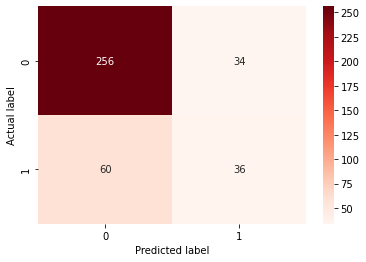

In [ ]:
CM = confusion_matrix(y_test, pred)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))